In [1]:
import pandas as pd
import numpy as np
from class_Stastics import Stastics  # Import the class
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

/home/german/Documents/German/github/statistics_class/class_Stastics.py:65: SyntaxWarning: invalid escape sequence '\+'
  unwanted_chars_dict.update({"\+":"signopos"," ":"_espacio_","-":"signoneg","/":"7barra7","\[":"_CORCHETE1_","\]":"_CORCHETE2_"})
/home/german/Documents/German/github/statistics_class/class_Stastics.py:65: SyntaxWarning: invalid escape sequence '\['
  unwanted_chars_dict.update({"\+":"signopos"," ":"_espacio_","-":"signoneg","/":"7barra7","\[":"_CORCHETE1_","\]":"_CORCHETE2_"})
/home/german/Documents/German/github/statistics_class/class_Stastics.py:65: SyntaxWarning: invalid escape sequence '\]'
  unwanted_chars_dict.update({"\+":"signopos"," ":"_espacio_","-":"signoneg","/":"7barra7","\[":"_CORCHETE1_","\]":"_CORCHETE2_"})
/home/german/Documents/German/github/statistics_class/class_Stastics.py:851: SyntaxWarning: invalid escape sequence '\('
  x_tick_labels = [re.sub(".*\(",f"{tick_label_names[i]} (",item) for i, item in enumerate(x_tick_labels)]


In [2]:
# Load an example dataset

dataset = load_breast_cancer(return_X_y=True, as_frame=True)

data = dataset[0]

metadata = dataset[1].to_frame().rename(columns={"target":"Condition"})

# Set a seed 
np.random.seed(seed=1)

# Create an age metadata column randomly but including a bias based in Condition
metadata["Age"] =10+(np.random.random(size=metadata.shape[0]) * 80).astype(float) \
    + np.array([ 0.2 if i==1 else 0.1 for i in  metadata.Condition]) \
    * (np.random.random(size=metadata.shape[0]) * 80).astype(float)*metadata["Condition"]

metadata["Condition"] = [ "Breast Cancer" if i==1 else "Control" for i in  metadata.Condition]

# Create a categorical variable with 3 levels randomly assigned
metadata["Alimentación"] = np.random.randint(0, high=3,size=metadata.shape[0]) 

# Create an instance of the Stastics class
statist = Stastics(data, metadata)

# Show the automaticaly generated description
display(statist.adata.uns["Description_All"])

/home/german/miniconda3/envs/myenv/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,Variable,Class,Count (%),Mean ± Std_dev,Median,Normal Data,IQR
0,Condition,Breast Cancer,357 (62.74),NaN,NaN,NaN,NaN
1,Condition,Control,212 (37.26),NaN,NaN,NaN,NaN
2,Age,NaN,569 (100.0),55.43 ± 24.34,56.99,False,33.49 - 76.1
3,Alimentación,2,203 (35.68),NaN,NaN,NaN,NaN
4,Alimentación,0,184 (32.34),NaN,NaN,NaN,NaN
5,Alimentación,1,182 (31.99),NaN,NaN,NaN,NaN


In [3]:
# Show a description of the Breast cancer patients metadata

statist.do_description(name="Breast_Cancer",subset=("Condition","Breast Cancer"))
display(statist.adata.uns["Description_Breast_Cancer"])

,Variable,Class,Count (%),Mean ± Std_dev,Median,Normal Data,IQR
0,Condition,Breast Cancer,357 (100.0),NaN,NaN,NaN,NaN
1,Age,NaN,357 (100.0),59.16 ± 24.2,61.83,False,37.39 - 79.67
2,Alimentación,2,131 (36.69),NaN,NaN,NaN,NaN
3,Alimentación,1,113 (31.65),NaN,NaN,NaN,NaN
4,Alimentación,0,113 (31.65),NaN,NaN,NaN,NaN


## PRINCIPAL COMPONENT ANALYSIS

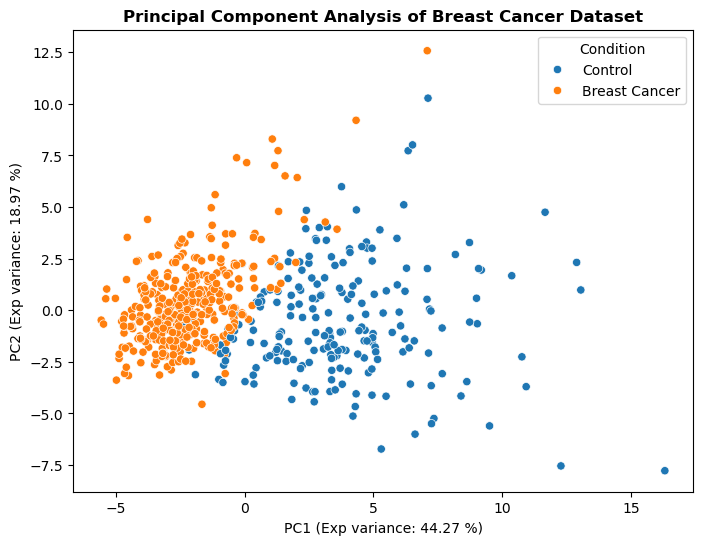

In [4]:
statist.plot_pca(vars=statist.adata.var_names,hue="Condition",title="Principal Component Analysis of Breast Cancer Dataset")

/tmp/ipykernel_9735/4109511883.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statist.plot_correlation(var_y=cor_results.loc[cor_results.Significative,"Variable_1"][0]
/home/german/miniconda3/envs/myenv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


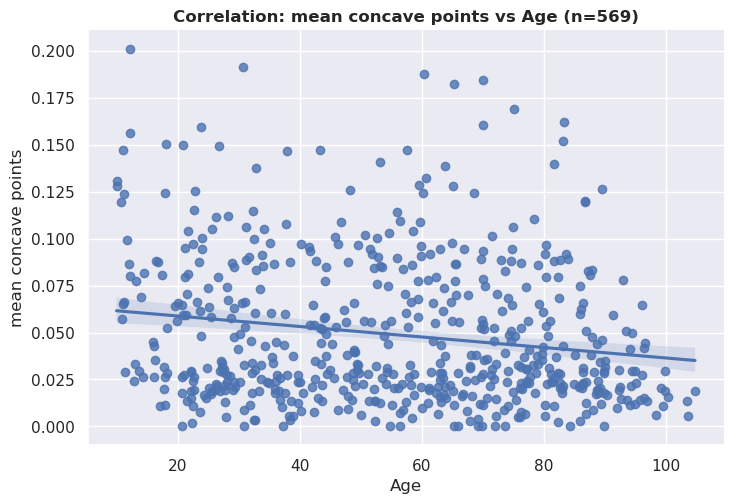

/home/german/miniconda3/envs/myenv/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


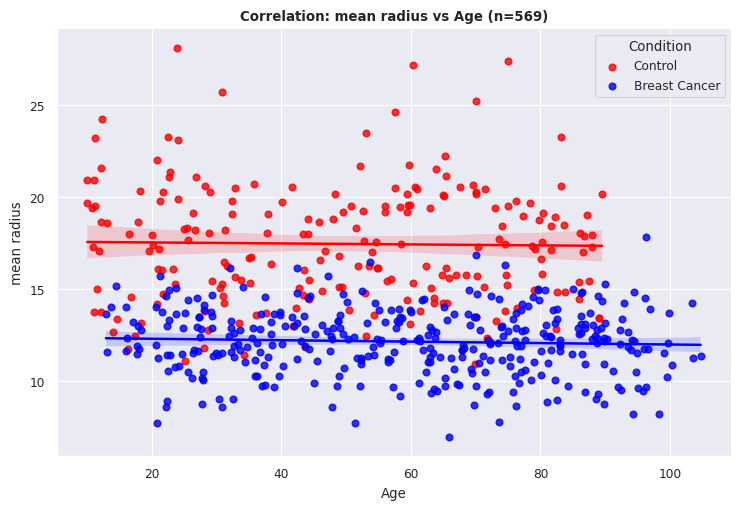

,Variable_1,Variable_2,Correlation,P-value,N,FDR,Significative
Correlated Variables,,,,,,,
Age vs mean concave points,mean concave points,Age,-0.168044,0.000056,569,0.000447,True
Age vs worst perimeter,worst perimeter,Age,-0.166865,0.000063,569,0.000447,True
Age vs mean perimeter,mean perimeter,Age,-0.166525,0.000066,569,0.000447,True
Age vs worst radius,worst radius,Age,-0.163654,0.000088,569,0.000447,True
Age vs worst area,worst area,Age,-0.163364,0.000091,569,0.000447,True


In [5]:
cor_results = statist.do_correlations(Variables_A="Age",Variables_B=statist.adata.var_names,name="Age_correlations",return_df=True).sort_values(by="P-value")
# Normal correlation
statist.plot_correlation(var_y=cor_results.loc[cor_results.Significative,"Variable_1"][0]
                         ,var_x="Age",theme="notebook")
# Correlation by condition
statist.plot_correlation(var_y="mean radius",var_x="Age",hue="Condition",palette=["red","blue"],theme="paper")
cor_results.head()

In [6]:

# Filter data based on metadata column (keep the adult patients)
ages = statist.adata.obs.Age[ statist.adata.obs.Age > 45 ].tolist()
statist.filter(var_name="Age", subgroup=ages)

/home/german/Documents/German/github/statistics_class/class_Stastics.py:134: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.adata.uns[f"Description_{name}"] = df_res


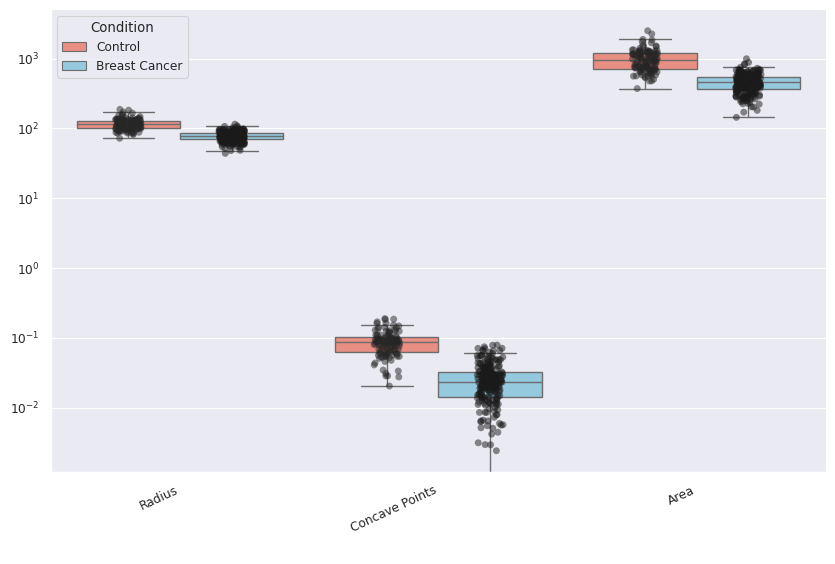

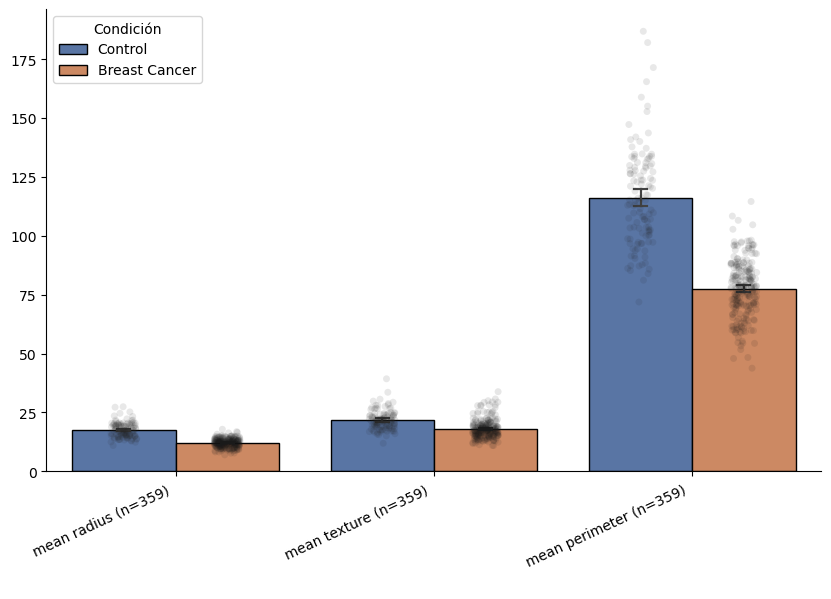

Name,Normal_Data,Test,P-value,Mean_Difference,Hodges_Lehmann_Estimator,N,FDR,Significant
Condition: mean perimeter,False,Mann-Whitney U,0.0,NaN,37.305,359,2.538881e-45,True
Condition: mean concave points,False,Mann-Whitney U,0.0,NaN,0.059976,359,2.538881e-45,True
Condition: mean area,False,Mann-Whitney U,0.0,NaN,492.6,359,2.979876e-44,True
Condition: mean radius,False,Mann-Whitney U,0.0,NaN,5.37,359,3.294791e-44,True
Condition: mean concavity,False,Mann-Whitney U,0.0,NaN,0.10431,359,2.540020e-40,True
Condition: mean compactness,False,Mann-Whitney U,0.0,NaN,0.0592,359,2.832255e-28,True
Condition: mean texture,False,Mann-Whitney U,0.0,NaN,3.72,359,6.705803e-17,True
Condition: mean smoothness,False,Mann-Whitney U,0.0,NaN,0.01012,359,4.145062e-11,True


In [7]:
# Compare the condition in the first 8 variables and plot their correlation with Age 
for var in statist.adata.var_names[:8]:

    # Perform comparisons between conditions in each variable
    comparison_results = statist.comparisons_1_1(target=var, condition="Condition")

    # Perform an anova analysis for the condition with 3 levels
    anova_res = statist.anova(target=var,condition="Alimentación",name="ANOVA_ALIMENTACIÓN")

comparison_results.sort_values(by="P-value",inplace=True) # Sotr the results by significance

# Plot differences by condition
statist.plot_differences(condition="Condition", # Choose the variable to split the data by
                         vars= comparison_results.index.str.replace("Condition: ?","",regex=True)[:3] # Show the 3 most significatly different variables
                         ,palette=["salmon","skyblue"], # Manualy set the colours of the plot
                         kind="Box", # Kind of plot, other options are Violin and Bar
                         ylog=True, # Log scale in the y axis
                         theme="paper", # Set a sns theme for the plot
                         tick_label_names=["Radius","Concave Points","Area"], # Change the x tick label names
                         show_n=False # Dont show the number of samples plotted
                         ) 

# Plot differences with the defaut options except for show and kind
_,ax = statist.plot_differences(condition="Condition", vars=statist.adata.var_names[:3].tolist(),
                                kind= "Bar",
                                show="Edit" # Return the axes of the figure
                                )
# You can also choose to return the plot in case you want to add some changes
plt.legend(title="Condición",loc="upper left")

# Change the transparency of the data points
for collection in ax.collections:
    collection.set_alpha(0.1) 
plt.show()
display(comparison_results) # Show the report of the comparisons

Name,F,P-value,N,Post-Hoc (Tukey),FDR,Significant
mean compactness: Alimentación,2.969581,0.08571,359,,0.685678,False
mean concave points: Alimentación,0.208527,0.648202,359,,0.950756,False
mean concavity: Alimentación,0.147181,0.701473,359,,0.950756,False
mean smoothness: Alimentación,0.096826,0.755853,359,,0.950756,False
mean texture: Alimentación,0.095148,0.757912,359,,0.950756,False
mean radius: Alimentación,0.038803,0.843952,359,,0.950756,False
mean area: Alimentación,0.007535,0.930874,359,,0.950756,False
mean perimeter: Alimentación,0.003819,0.950756,359,,0.950756,False


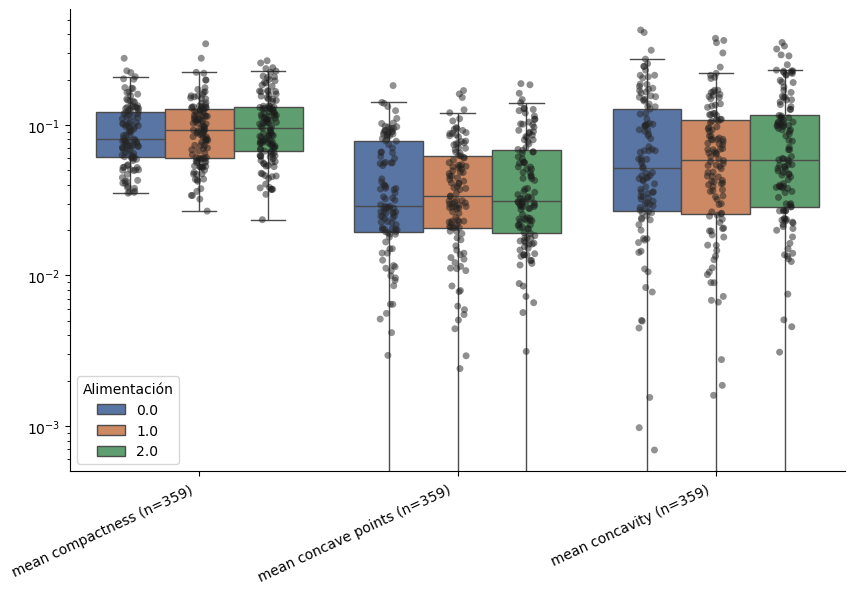

In [8]:
# Show the anova results, as we created this condition randomly we didnt expect to get any significant results
anova_res  = anova_res[0].sort_values(by="P-value")
display(anova_res)
# Plot the three most significant results 
statist.plot_differences(vars=anova_res.iloc[:3,:].index.str.replace(":.*","",regex=1),
                         condition="Alimentación",ylog=1)

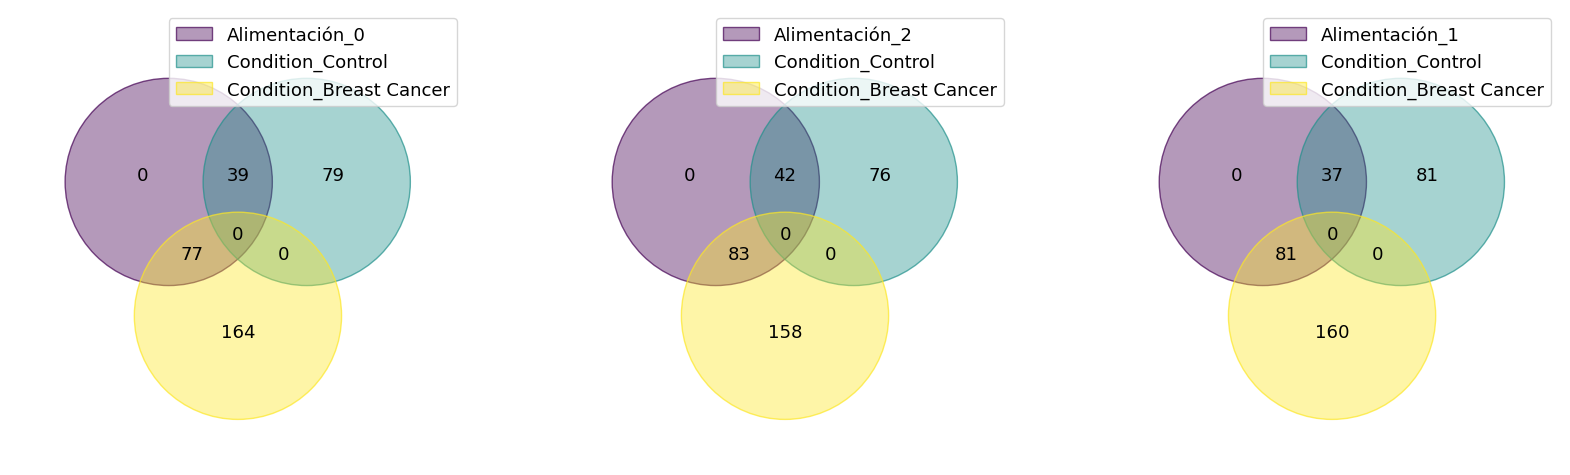

Name,Chi2_statistic,P-value,N,FDR,Significant
Alimentación-Condition,0.182406,0.912832,359.0,0.912832,False


In [9]:
 # Test the dependency of the variables (Chi squared test) and show the overlap with a venn plot
statist.plot_venn(["Alimentación","Condition"],figsize=(20,10))
statist.chi_sq(col=["Alimentación","Condition"])